🔍 **Dataset Description:**
- The dataset contains 244 entries, each representing a meal at a restaurant.
- It includes information about the total bill, tip amount, and various factors that might influence tipping behavior.

Key features in the dataset include:
- `total_bill`: The total amount of the bill (in US dollars)
- `tip`: The amount of the tip (in US dollars)
- `sex`: The gender of the person paying the bill
- `smoker`: Whether the party included smokers (Yes/No)
- `day`: The day of the week
- `time`: Whether it was a dinner or lunch
- `size`: The number of people in the party

## <a id='toc1_'></a>[Data Exploration and Preprocessing](#toc0_)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load the tips dataset
tips_data = sns.load_dataset('tips')

In [16]:
# Display the first few rows and columns
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [17]:
# Getting some information about dataset
tips_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [18]:
# Getting sume statistical imformation
tips_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### <a id='toc1_1_'></a>[Handling Missing Values](#toc0_)


In [19]:
# Checking missing values
tips_data.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [20]:
# Getting the number od rows and columns
tips_data.shape

(244, 7)

In [13]:
# Checking duplicate data
tips_data.duplicated().sum()

np.int64(0)

In [21]:
tips_data.drop_duplicates(inplace=True)

In [22]:
# Getting the number od rows and columns after dropping duplicate data
tips_data.shape

(243, 7)

### <a id='toc1_2_'></a>[Exploratory Data Analysis (EDA)](#toc0_)


Text(0, 0.5, 'Frequency')

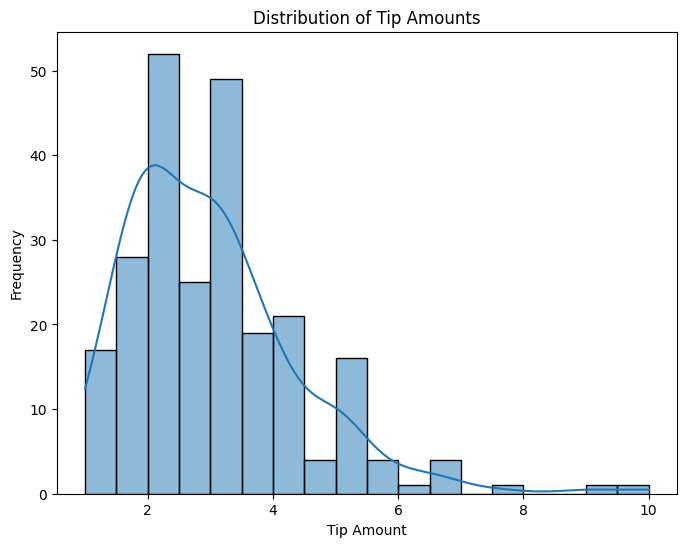

In [23]:
# Distribution of tip amounts
plt.figure(figsize=(8, 6))
sns.histplot(tips_data['tip'], kde=True)
plt.title('Distribution of Tip Amounts')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')

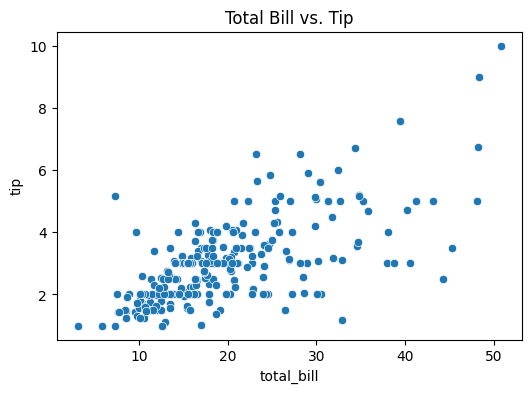

In [25]:
# Relationship between total bill and tip
plt.figure(figsize=(6, 4))
sns.scatterplot(x = 'total_bill', y='tip', data = tips_data)
plt.title('Total Bill vs. Tip')
plt.show()

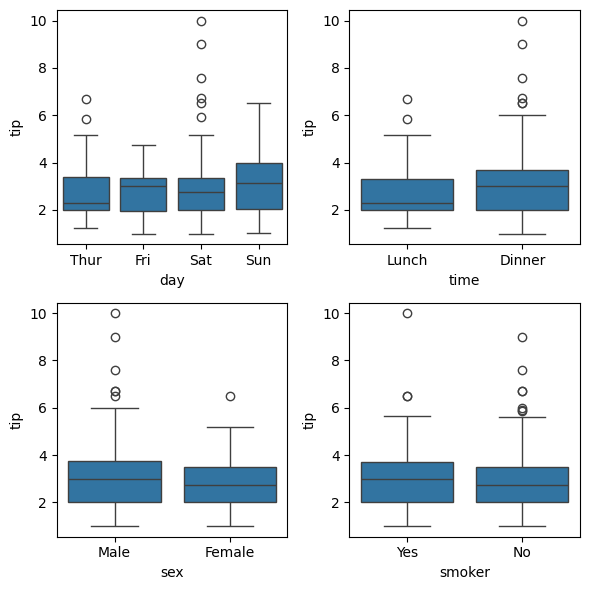

In [27]:
# Box plots for categorical variables
fig, axs = plt.subplots(2, 2, figsize=(6, 6))
sns.boxplot(x='day', y='tip', data = tips_data, ax = axs[0,0])
sns.boxplot(x='time', y='tip', data = tips_data, ax = axs[0,1])
sns.boxplot(x='sex', y='tip', data = tips_data, ax = axs[1,0])
sns.boxplot(x='smoker', y='tip', data = tips_data, ax = axs[1,1])
plt.tight_layout()
plt.show()

### <a id='toc1_3_'></a>[Feature Encoding](#toc0_)

In [28]:
# Categorical encoding for 'sex', 'smoker', and 'time'
tips_data['sex'] = tips_data['sex'].cat.codes
tips_data['smoker'] = tips_data['smoker'].cat.codes
tips_data['time'] = tips_data['time'].cat.codes

# One-hot encoding for 'day'
tips_data = pd.get_dummies(tips_data, columns=['day'], prefix='day')

tips_data.head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,1,1,1,2,False,False,False,True
1,10.34,1.66,0,1,1,3,False,False,False,True
2,21.01,3.50,0,1,1,3,False,False,False,True
3,23.68,3.31,0,1,1,2,False,False,False,True
4,24.59,3.61,1,1,1,4,False,False,False,True


### <a id='toc1_5_'></a>[Preparing for Modeling](#toc0_)


In [29]:
X = tips_data.drop('tip', axis=1)
y = tips_data['tip']

print(X.columns)

Index(['total_bill', 'sex', 'smoker', 'time', 'size', 'day_Thur', 'day_Fri',
       'day_Sat', 'day_Sun'],
      dtype='object')


## <a id='toc2_'></a>[Feature Selection and Engineering](#toc0_)

### <a id='toc2_1_'></a>[Correlation Analysis](#toc0_)


In [31]:
# Calculate correlations
corr_matrix = tips_data.corr()
corr_matrix

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
total_bill,1.000000,0.674998,-0.141350,-0.090136,0.179232,0.597589,-0.133758,-0.087201,0.052703,0.121096
tip,0.674998,1.000000,-0.085274,-0.009763,0.117596,0.488400,-0.091433,-0.056398,-0.005016,0.123360
sex,-0.141350,-0.085274,1.000000,0.009930,-0.198129,-0.083248,0.186796,0.072950,-0.050085,-0.165155
smoker,-0.090136,-0.009763,0.009930,1.000000,-0.063911,0.130564,0.138821,-0.246709,-0.160366,0.178861
time,0.179232,0.117596,-0.198129,-0.063911,1.000000,0.100045,-0.917076,-0.060416,0.460764,0.416226
size,0.597589,0.488400,-0.083248,0.130564,0.100045,1.000000,-0.068834,-0.143033,-0.043040,0.191713
day_Thur,-0.133758,-0.091433,0.186796,0.138821,-0.917076,-0.068834,1.000000,-0.168609,-0.432341,-0.390551
day_Fri,-0.087201,-0.056398,0.072950,-0.246709,-0.060416,-0.143033,-0.168609,1.000000,-0.217495,-0.196472
day_Sat,0.052703,-0.005016,-0.050085,-0.160366,0.460764,-0.043040,-0.432341,-0.217495,1.000000,-0.503786
day_Sun,0.121096,0.123360,-0.165155,0.178861,0.416226,0.191713,-0.390551,-0.196472,-0.503786,1.000000


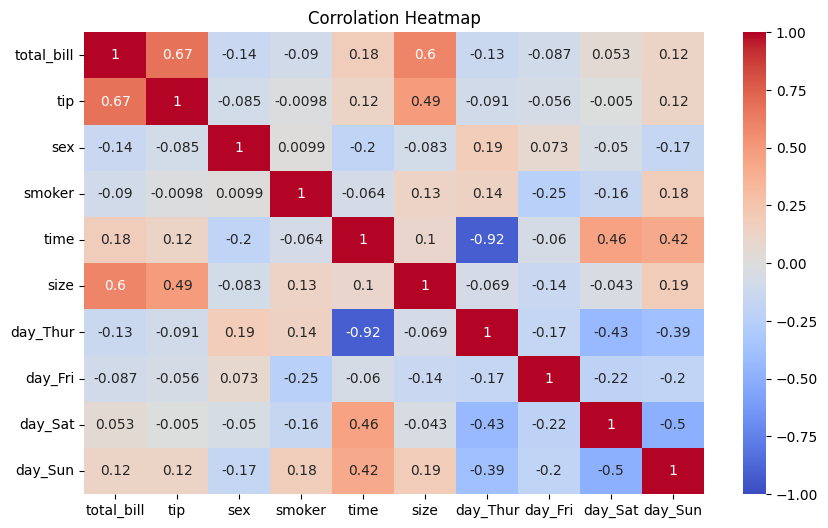

In [33]:
# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap= 'coolwarm', vmin=-1, vmax = 1, center = 0)
plt.title('Corrolation Heatmap')
plt.show()